<a href="https://colab.research.google.com/github/epraichu/ai-gp-course/blob/main/lesson16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Sekcja 1: Import bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import math

In [51]:
df = sns.load_dataset("iris")
print(df.head())
print(len(df))
print(df["species"].value_counts())

feature_pairs = [
 ('sepal_length', 'sepal_width'),
 ('sepal_length', 'petal_length'),
 ('sepal_length', 'petal_width'),
 ('sepal_width', 'petal_width'),
 ('sepal_width', 'petal_length'),
 ('petal_length', 'petal_width')
]

feature_names_pl = {
 'sepal_length': 'Długość działki kielicha (cm)',
 'sepal_width': 'Szerokość działki kielicha (cm)',
 'petal_length': 'Długość płatka (cm)',
 'petal_width': 'Szerokość płatka (cm)'
}

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
150
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


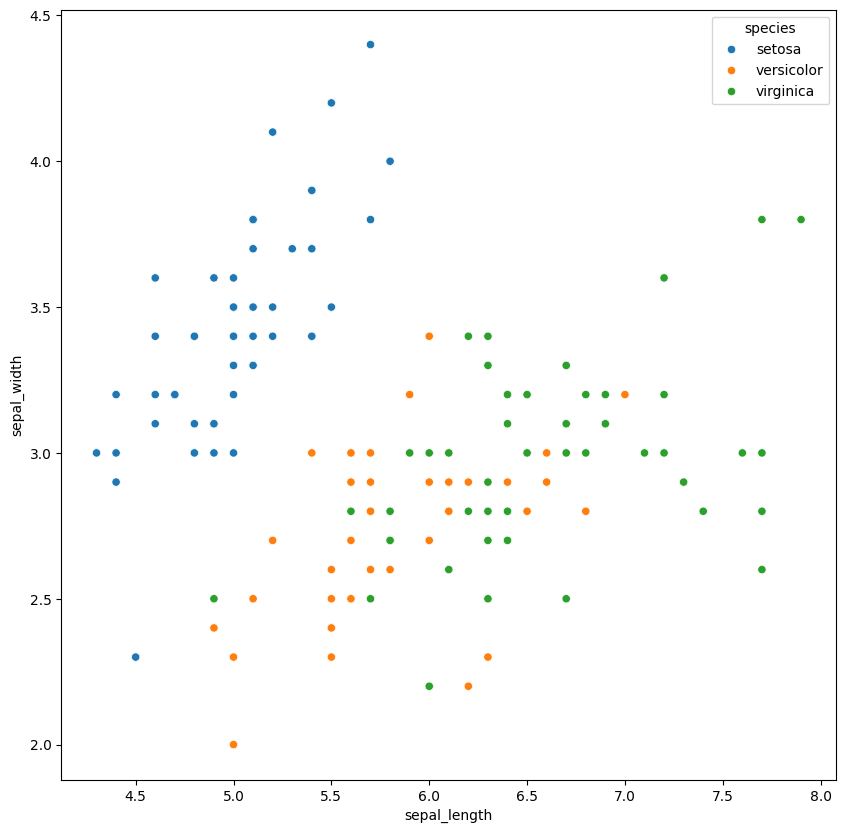

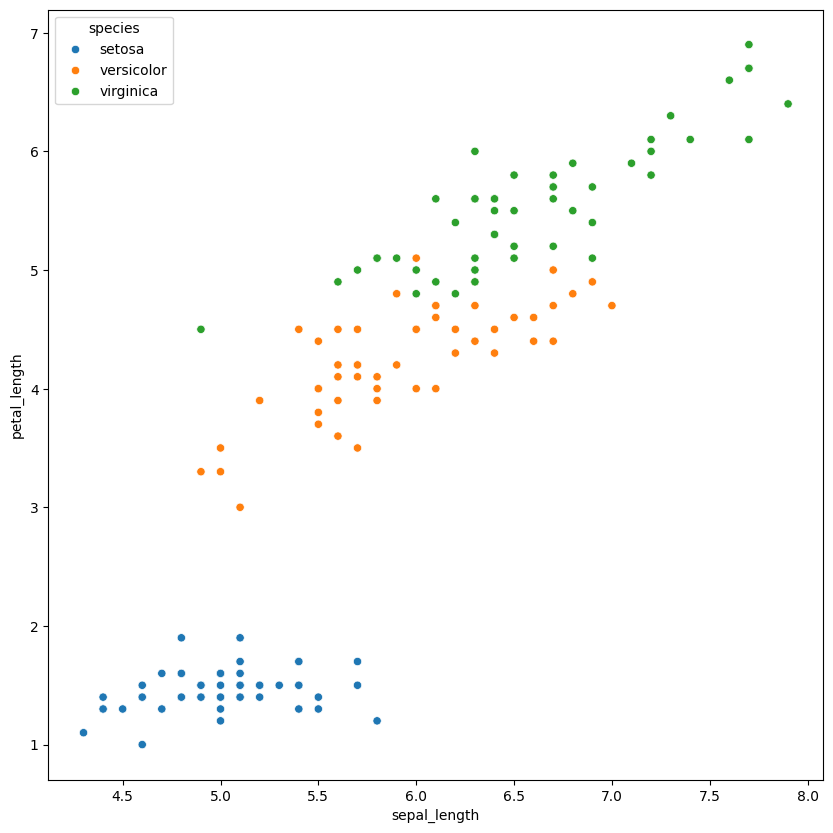

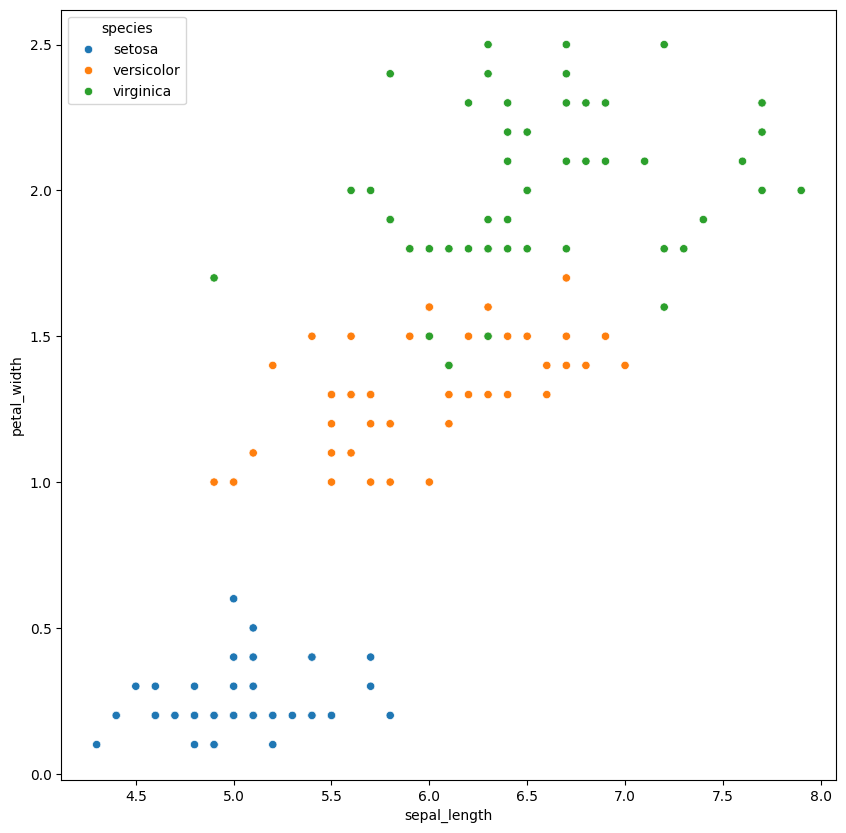

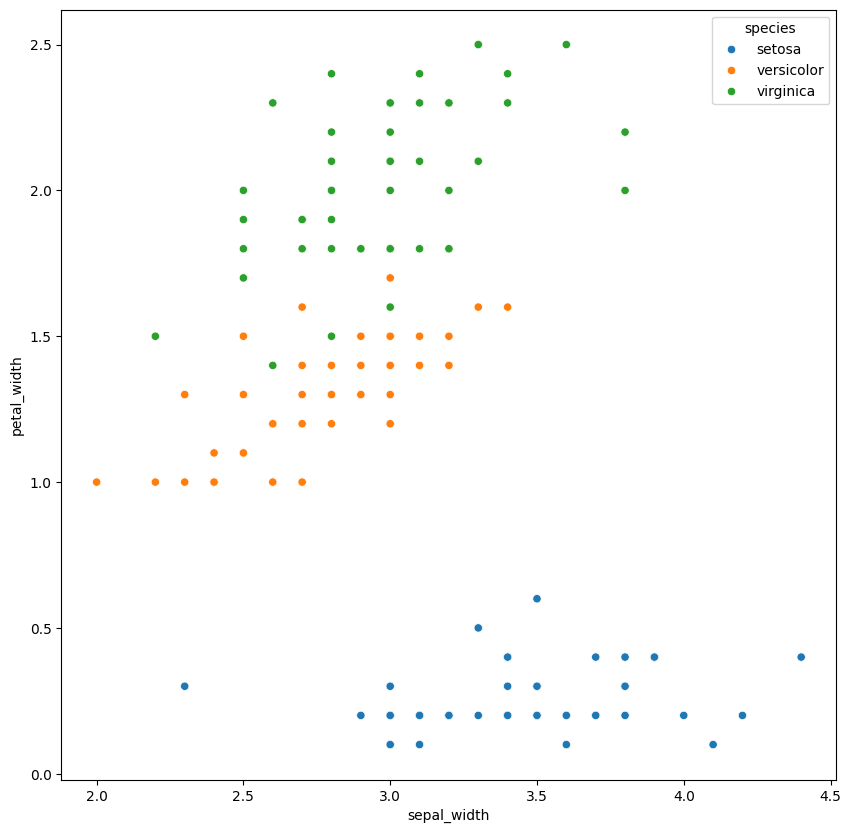

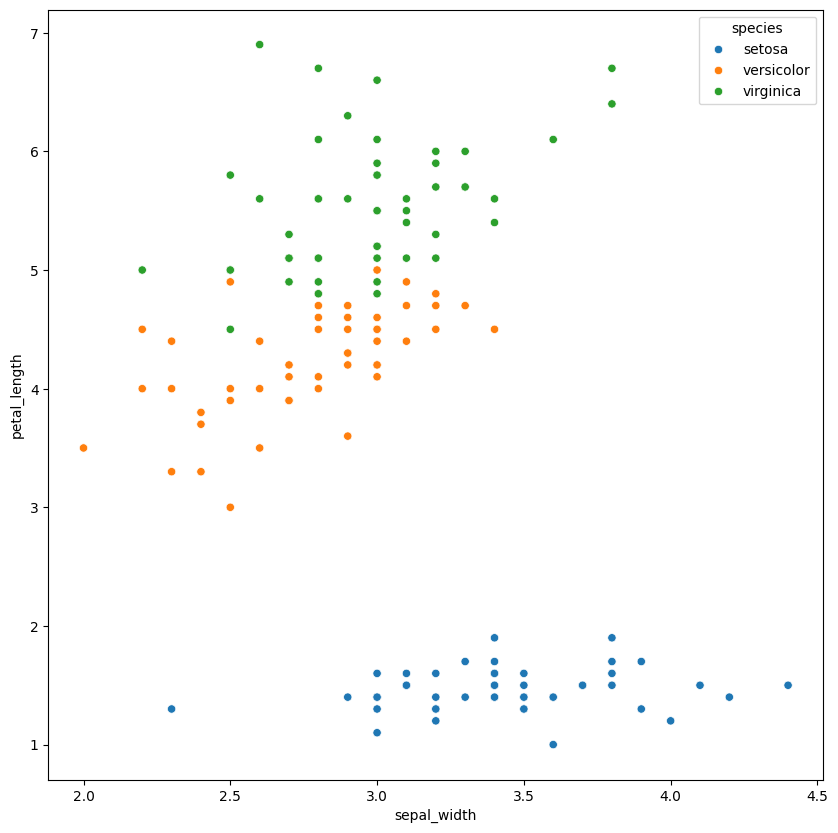

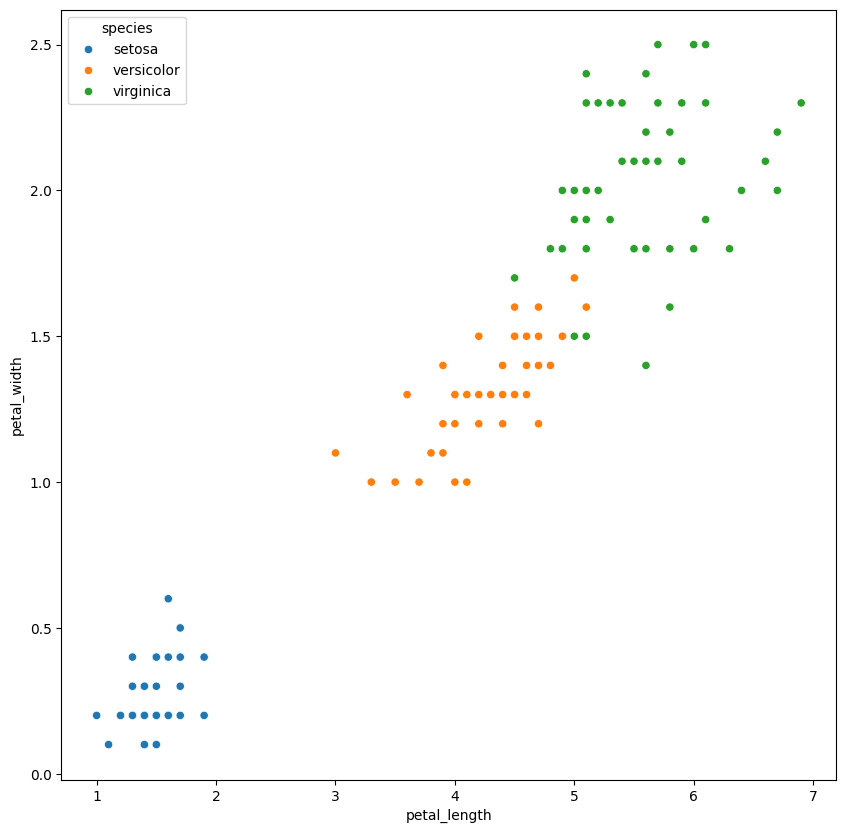

In [52]:
for x_feature, y_feature in feature_pairs:
  plt.figure(figsize=(10,10))

  sns.scatterplot(
      data=df,
      x=x_feature,
      y=y_feature,
      hue='species'
  )

In [53]:
X = df.drop(columns="species").values
y = df["species"].values

# Podział na zbiór uczący i testowy z przetasowaniem danych
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)


#Sekcja 5 - implementacja algorytmu KNN

def calculate_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
      distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)

def knn_classifier(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        distances = []
        # Obliczenie odległości do wszystkich punktów treningowych
        for i, train_point in enumerate(X_train):
            dist = calculate_distance(test_point, train_point)
            distances.append((dist, y_train[i]))

        # Sortowanie według odległości (pierwszy element krotki)
        distances.sort(key=lambda x: x[0])

        # Wybranie k najbliższych sąsiadów na podstawie głosów
        neighbors = distances[:k]
        votes = {}

        for _, label in neighbors:
            if label in votes:
                votes[label] +=1
            else:
                votes[label] = 1

        # Znalezienie etykiety z największą liczbą głosów
        max_votes = 0
        most_common_label = None

        for label, count in votes.items():
            if count > max_votes:
                max_votes = count
                most_common_label = label
        predictions.append(most_common_label)

    return predictions

In [55]:
def test_KNN(k):
    predictions = knn_classifier(X_train, y_train, X_test, k)

    # Wyświetlanie wyników
    print("\nWyniki predykcji:")
    for i, prediction in enumerate(predictions):
        print(f"Próbka {i+1}: Predykcja = {prediction}, Rzeczywisty = {y_test[i]}")

  # Obliczanie dokładności
    predictions = np.array(predictions)
    correct = np.sum(predictions == y_test)
    accuracy = correct / len(y_test)
    print(f"\nDokładność algorytmu KNN dla k = {k}: {accuracy:.2f}")

test_KNN(5)


Wyniki predykcji:
Próbka 1: Predykcja = setosa, Rzeczywisty = setosa
Próbka 2: Predykcja = virginica, Rzeczywisty = virginica
Próbka 3: Predykcja = versicolor, Rzeczywisty = versicolor
Próbka 4: Predykcja = versicolor, Rzeczywisty = versicolor
Próbka 5: Predykcja = setosa, Rzeczywisty = setosa
Próbka 6: Predykcja = versicolor, Rzeczywisty = versicolor
Próbka 7: Predykcja = setosa, Rzeczywisty = setosa
Próbka 8: Predykcja = setosa, Rzeczywisty = setosa
Próbka 9: Predykcja = virginica, Rzeczywisty = virginica
Próbka 10: Predykcja = versicolor, Rzeczywisty = versicolor
Próbka 11: Predykcja = virginica, Rzeczywisty = virginica
Próbka 12: Predykcja = virginica, Rzeczywisty = virginica
Próbka 13: Predykcja = virginica, Rzeczywisty = virginica
Próbka 14: Predykcja = versicolor, Rzeczywisty = versicolor
Próbka 15: Predykcja = setosa, Rzeczywisty = setosa
Próbka 16: Predykcja = setosa, Rzeczywisty = setosa
Próbka 17: Predykcja = setosa, Rzeczywisty = setosa
Próbka 18: Predykcja = versicolor, R